<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
df = pd.read_csv("DMV_Written_Tests.csv")

In [4]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

(100, 3)
       DMV_Test_1  DMV_Test_2     Results
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000
    DMV_Test_1  DMV_Test_2  Results
0        False       False    False
1        False       False    False
2        False       False    False
3        False       False    False
4        False       False    False
..         ...         ...      ...
95       False       False    False
96       False       False    False
97       False       False    False
98       False       False    False
99       False       False    False

[100 rows x 3 columns]


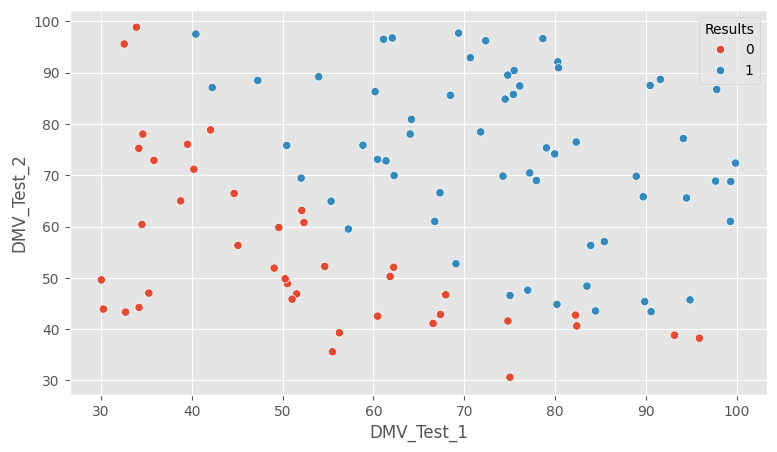

In [6]:
print(df.shape)
print(df.describe())
print(df.isnull())
plt.figure(figsize=(9,5))
sns.scatterplot(x="DMV_Test_1",y="DMV_Test_2",data=df,hue="Results")
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [8]:
print(sigmoid(4))

0.9820137900379085


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [9]:
from sklearn.preprocessing import StandardScaler

x_raw=df[["DMV_Test_1","DMV_Test_2"]].values
y=df["Results"].values

sc=StandardScaler()
x_feat=sc.fit_transform(x_raw)

X=np.c_[np.ones(len(x_feat)),x_feat]
theta=np.zeros(X.shape[1])

def cost_grad(X,y,theta):
    m=len(y)
    z=X@theta
    h=sigmoid(z)
    h=np.clip(h,1e-15,1-1e-15)
    j=(-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    g=(1/m)*(X.T@(h-y))
    return j,g


### Task 6: Cost and Gradient at Initialization
---

In [10]:
j,g=cost_grad(X,y,theta)
print("Initial cost:",j)
print("Initial gradient:",g)


Initial cost: 0.6931471805599453
Initial gradient: [-0.1        -0.28122914 -0.25098615]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [14]:
alpha=0.1
n_iter=3000
costs=[]

for i in range(n_iter):
    j,g=cost_grad(X,y,theta)
    theta-=alpha*g
    costs.append(j)
    if i%100==0:
        print("Itr",i,"Cost",j)

print("Theta:",theta)


Itr 0 Cost 0.20350066009027712
Itr 100 Cost 0.20350033367436798
Itr 200 Cost 0.2035000434170356
Itr 300 Cost 0.20349978528953053
Itr 400 Cost 0.20349955571574188
Itr 500 Cost 0.2034993515207353
Itr 600 Cost 0.20349916988523933
Itr 700 Cost 0.2034990083053776
Itr 800 Cost 0.20349886455702948
Itr 900 Cost 0.2034987366642747
Itr 1000 Cost 0.20349862287144557
Itr 1100 Cost 0.20349852161836687
Itr 1200 Cost 0.2034984315184123
Itr 1300 Cost 0.20349835133905247
Itr 1400 Cost 0.20349827998460726
Itr 1500 Cost 0.20349821648094765
Itr 1600 Cost 0.20349815996192486
Itr 1700 Cost 0.20349810965732848
Itr 1800 Cost 0.20349806488219874
Itr 1900 Cost 0.20349802502733996
Itr 2000 Cost 0.2034979895508972
Itr 2100 Cost 0.2034979579708764
Itr 2200 Cost 0.20349792985850101
Itr 2300 Cost 0.20349790483231153
Itr 2400 Cost 0.2034978825529219
Itr 2500 Cost 0.20349786271836157
Itr 2600 Cost 0.20349784505993584
Itr 2700 Cost 0.20349782933854607
Itr 2800 Cost 0.20349781534141936
Itr 2900 Cost 0.20349780287920133


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

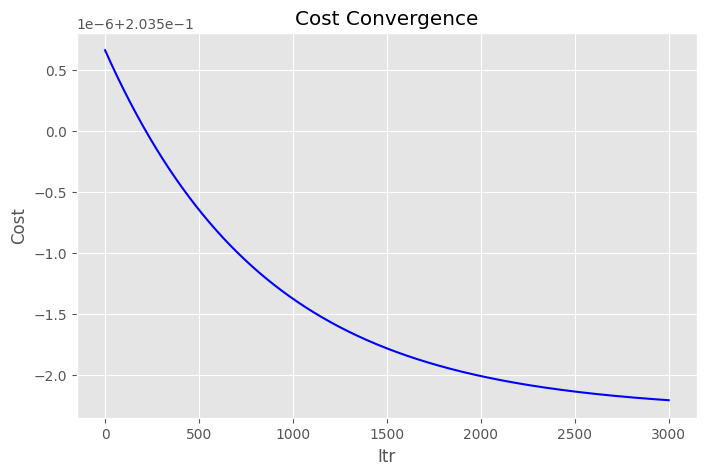

In [15]:
plt.figure(figsize=(8,5))
plt.plot(range(n_iter),costs,'b-')
plt.xlabel("Itr")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

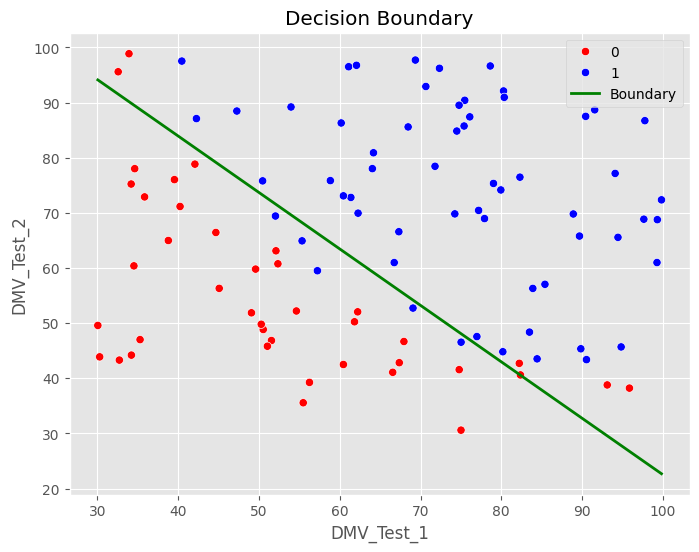

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="DMV_Test_1",y="DMV_Test_2",data=df,hue="Results",palette=["red","blue"])

x1=np.linspace(df["DMV_Test_1"].min(),df["DMV_Test_1"].max(),200)
x1_s=(x1-sc.mean_[0])/sc.scale_[0]
x2_s=-(theta[0]+theta[1]*x1_s)/theta[2]
x2=x2_s*sc.scale_[1]+sc.mean_[1]

plt.plot(x1,x2,color="green",linewidth=2,label="Boundary")
plt.xlabel("DMV_Test_1")
plt.ylabel("DMV_Test_2")
plt.title("Decision Boundary")
plt.legend()
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [17]:
def pred_prob(X,theta):
    return sigmoid(X@theta)

def pred(X,theta,thr=0.5):
    return (pred_prob(X,theta)>=thr).astype(int)

y_p=pred(X,theta)
acc=(y_p==y).mean()
print("Train Acc:",acc*100)


Train Acc: 89.0
